- 컬러 이미지를 gray 이미지로 변환
- gray 이미지를 binary 이미지로 변환
    - 컬러는 너무 많은 정보를 가지고 있음 -> 연산량 과다
    - gray or binary 이미지로 변환하여 처리하는 것이 일반적

- gray 이미지 : 0~255사이 숫자값으로 구성된 흑백 이미지
- binary(이진) 이미지 : 0(검정색)과 255(흰색)으로만 구성된 이미지

#####  gray 이미지 만들기

In [1]:
import cv2
import matplotlib.pyplot as plt

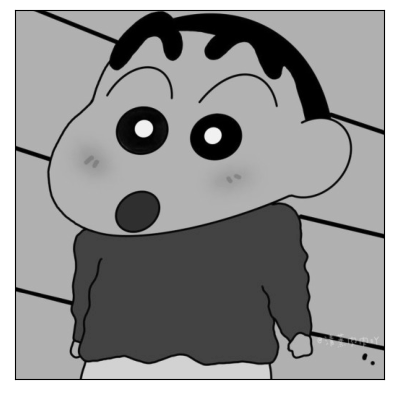

In [5]:
# 1. 이미지를 읽을 때부터 흑백 이미지로!
img = cv2.imread('jjang.jpg', cv2.IMREAD_GRAYSCALE) # 2차원 배열
plt.imshow(img, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

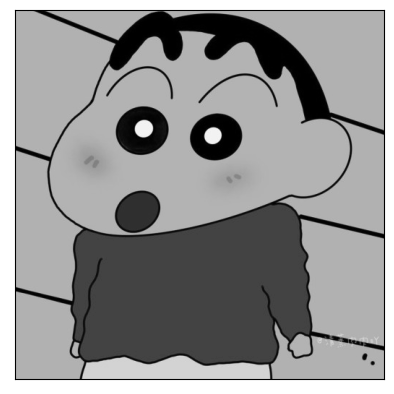

In [7]:
# 2. 컬러 이미지로 읽어서 gray 이미지로 변환하는 방법
img = cv2.imread('jjang.jpg', cv2.IMREAD_COLOR) 

# BGR 컬러이미지를 gray로 변환
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(grayimg, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

##### 이진(Binary) 이미지 만들기

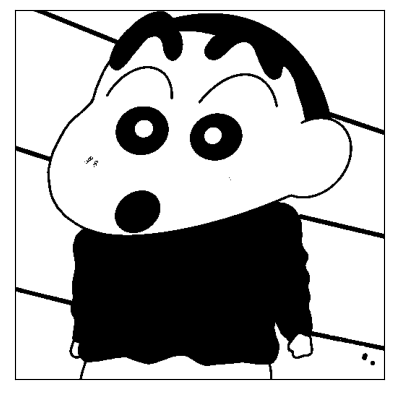

In [8]:
img = cv2.imread('jjang.jpg', cv2.IMREAD_GRAYSCALE) 

# threshold(이미지, 문턱값(기준값), 기준보다 클 때 적용되는 값, 적용 방법)
_, thr = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thr, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

##### 임곗값 결정 : 1. OTSU 알고리즘
- 이진 이미지의 중요 요소 : 임곗값 결정
1. 임의로 임계값을 설정 후 픽셀을 두 분류로 나눔 (흑, 백)
2. 두 분류의 명암 분포를 구함 -> 반복
3. 두 분류의 명암 분포가 가장 균일한 임곗값을 선택
- 단점 : 모든 경우의 수 조사 -> 속도가 느림!

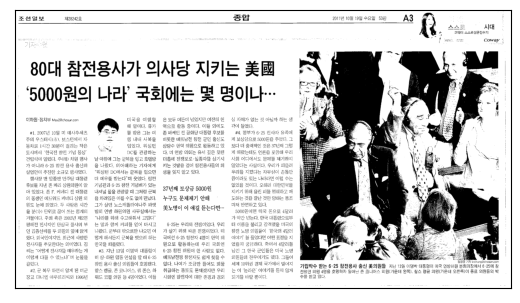

In [11]:
# 이미지 띄우기
img = cv2.imread('news_paper.jpg', cv2.IMREAD_GRAYSCALE)

_, thr = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thr, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

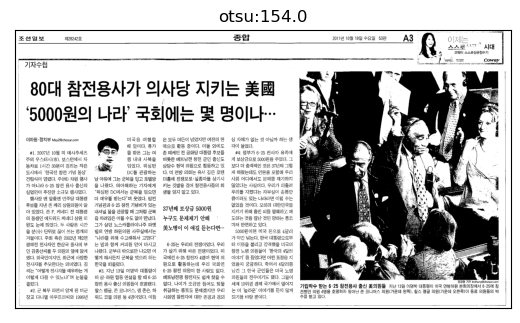

In [19]:
# OTSU 알고리즘 
img = cv2.imread('news_paper.jpg', cv2.IMREAD_GRAYSCALE)

_, thr2 = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)

plt.title(f'otsu:{_}')
plt.imshow(thr2, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

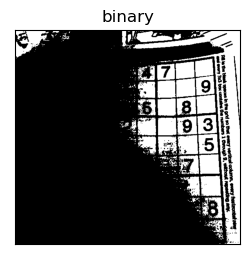

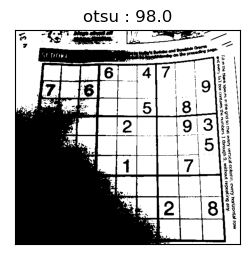

In [27]:
img = cv2.imread('sudoku.png', cv2.IMREAD_GRAYSCALE)

_, thr = cv2.threshold(img, 129, 255, cv2.THRESH_BINARY)

plt.subplot(1,2,1)
plt.imshow(thr, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('binary')
plt.show()

_, thr2 = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.subplot(1,2,2)
plt.title(f'otsu : {_}')
plt.imshow(thr2, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

##### 임곗값 결정 : 2.적응형 thresholding
1. 이미지를 여러 영역으로 나눔
2. 해당 영역의 픽셀 값만 활용하여 경계값 계산
3. 각 영역별로 이진화 진행 

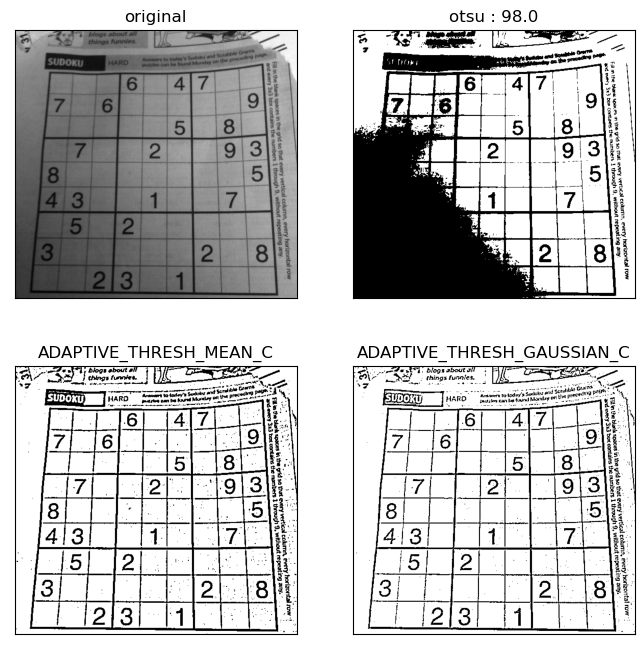

In [29]:
img = cv2.imread('sudoku.png', cv2.IMREAD_GRAYSCALE)

_, thr2 = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

blk_size = 9 # 블럭(영역) 사이즈
C = 5        # 차감 상수

# 적응형 thresholding
# cv2.ADAPTIVE_THRESH_MEAN_C : 이웃의 픽셀로 평균 조정 -> 선명하게 표현 (노이즈도 잘 보임)
thr3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                     cv2.THRESH_BINARY, blk_size, C)
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 가우시안 분포에 따른 가중치의 합으로 결정 -> 흐릿하게 표현
thr4 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                     cv2.THRESH_BINARY, blk_size, C)


# 출력 시키는 코드
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('original')
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.title(f'otsu : {_}')
plt.imshow(thr2, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.title('ADAPTIVE_THRESH_MEAN_C')
plt.imshow(thr3, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.title('ADAPTIVE_THRESH_GAUSSIAN_C')
plt.imshow(thr4, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.show()